In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy.integrate import odeint
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
def nuke_Epa(x):
    if (abs(x) <= 1):
        return 3/4 * (1-x**2)
    else:
        return 0
    
def nuke_Epa_der(x):
    if (abs(x) <= 1):
        return (-3*x)/2
    else:
        return 0
    
def h_estimate_opt(X_pred, x_train, y_train, par_blur, nuke_der):
    def find_borders(x, some_x, par_blur):
        # x - точки диапазона переменной обучающей выборки
        # some_x - точка, значение в которой нужно предсказать
        # par_blur - параметр размытости
        # border_index -  индекс правой границы
        border_index = len(x)-1
        border_value = some_x + 30*par_blur
        for i in range(len(x)):
            if ( x.iloc[i] > border_value ):
                return i
        return border_index
    
    border_index = find_borders(x_train, X_pred, par_blur)
    x_train = x_train[0:border_index]
    y_train = y_train[0:border_index]
    c = 0
    size = len(x_train)
    T = x_train.iloc[-1] - x_train.iloc[0]
    z = T / (size * (par_blur**2))
    for i in range(size):
        c += y_train.iloc[i] * nuke_der((X_pred-x_train.iloc[i])/par_blur)
    return z * c

In [ ]:
def u_one(x):
    if (x>=0):
        return 1
    else: return 0

In [ ]:
def h_pic(data, data_sample):
    fig = plt.figure(figsize =(10, 5))
    ax = plt.axes()
    plt.title('Восстановление весовой функции')
    ax.plot(data['t'], data['obj1_one'],c='magenta', label='$k$')
    ax.plot(data['t'],data['obj1_one_derivative'],'--', c='magenta', label='$h$')

    ax.plot(data_sample['t'],data_sample['h_estimate'], c='red', label='$\hat{h}$')

    ax.scatter(data_sample['t'], data_sample['obj1_one'],c='#D752FF', s=10)
    ax.scatter(data_sample['t'], data_sample['obj1_one_derivative'],c='#D752FF', s=10)

    plt.legend()
    plt.grid()
    plt.show()

def w_pic(data, data_sample):
    fig = plt.figure(figsize =(10, 5))
    ax = plt.axes()
    plt.title('Обратная весовая функция')
    ax.plot(data['t'], data['obj1_one'],c='magenta', label='$k$')
    ax.plot(data['t'],data['obj1_one_derivative'],'--', c='magenta', label='$h$')

    ax.plot(data_sample['t'],data_sample['h_estimate'], c='red', label='$\hat{h}$')

    ax.scatter(data_sample['t'], data_sample['obj1_one'],c='#D752FF', s=10)
    ax.scatter(data_sample['t'], data_sample['obj1_one_derivative'],c='#D752FF', s=10)

    ax.plot(data_sample['t'],data_sample['w_estimate'], c='blue', label='$\hat{w}$')

    ax.set_xlim(0,2)
    ax.set_ylim(-3000,3000)
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
T = 12.5
period = 10
dispersion = 0.05
random_state = 10

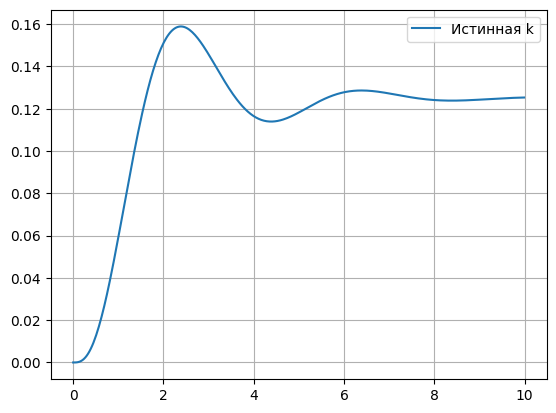

In [11]:
def runge_kutta_4th_order(funcs, y0, t0, t_end, dt):
    num_steps = int((t_end - t0) / dt)
    t_values = np.linspace(t0, t_end, num_steps + 1)
    y_values = np.zeros((num_steps + 1, len(y0)))
    y_values[0] = y0

    for i in range(num_steps):
        t = t_values[i]
        y = y_values[i]

        k1 = funcs(t, y)
        k2 = funcs(t + dt / 2, y + dt / 2 * k1)
        k3 = funcs(t + dt / 2, y + dt / 2 * k2)
        k4 = funcs(t + dt, y + dt * k3)

        y_values[i + 1] = y + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    return t_values, y_values

def system_of_equations(t, y):

    u = 1 if t > 0 else 0
    return np.array([y[1],
                     y[2],
                     u - 4 * y[2] - 6 * y[1] - 8 * y[0]])



def solve_differential_equation(t_array,dt):

    y0 = np.array([0, 0, 0])  # Предполагаем начальные условия: y(0)=0, y'(0)=0, y''(0)=0
    t0 = t_array[0]
    t_end = t_array[-1]

    t_values, y_values = runge_kutta_4th_order(system_of_equations, y0, t0, t_end, dt)


    return np.interp(t_array, t_values, y_values[:, 0])

dt = 0.03
t_array = np.arange(0, 10, dt)


results = solve_differential_equation(t_array,dt)




plt.plot(t_array, results, label='Истинная k')
plt.grid()
plt.legend()
plt.show()